# ANALYSE DE LA RELATION DES DIFFÉRENTES CARACTÉRISTIQUES AVEC LE PRIX

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv("carprice.csv")

In [3]:
profile = ProfileReport(df, title="Profiling Report")

In [4]:
#profile.to_file("carprice.html")

In [5]:
#profile.to_notebook_iframe()

## Observation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Vérifier s'il y a des valeurs manquantes dans chaque colonne
missing_values = df.isnull().sum()
print(f"Valeurs manquantes :\n{missing_values}")

Valeurs manquantes :
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [9]:
# Inspecter chaque colonne : 
for value in df:
    print(df[value].value_counts())
    print()

1      1
142    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    1
143    1
130    1
144    1
145    1
146    1
147    1
148    1
149    1
150    1
151    1
152    1
153    1
131    1
129    1
104    1
116    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
115    1
117    1
128    1
118    1
119    1
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
154    1
155    1
156    1
193    1
183    1
184    1
185    1
186    1
187    1
188    1
189    1
190    1
191    1
192    1
194    1
157    1
195    1
196    1
197    1
198    1
199    1
200    1
201    1
202    1
203    1
204    1
182    1
181    1
180    1
179    1
158    1
159    1
160    1
161    1
162    1
163    1
164    1
165    1
166    1
167    1
168    1
169    1
170    1
171    1
172    1
173    1
174    1
175    1
176    1
177    1
178    1
105    1
103    1
2      1
39     1
29     1
30     1
31     1
32     1
33     1
34     1
3

In [10]:
# Afficher le résultat de value_counts() pour une colonne spécifique de votre DataFrame
print(df['CarName'].value_counts())

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

In [11]:
df.shape

(205, 26)

## Nettoyage

In [12]:
print("Doublons =",df.duplicated().sum())

Doublons = 0


In [13]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
Car_Model = df["CarName"].apply(lambda x: x.split(" ")[1] if len(x.split(" "))>1 else np.nan)
df.insert(2,"CompanyName",Company_Name)
df.insert(3,"CarModel",Car_Model)

In [14]:
# Vérifier s'il y a des valeurs manquantes suite à cette création de colonne
missing_values = df.isnull().sum()
print(f"Valeurs manquantes :\n{missing_values}")

Valeurs manquantes :
car_ID              0
symboling           0
CompanyName         0
CarModel            2
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [15]:
# Remplacer les valeurs manquantes par le modèle le plus courant pour chaque entreprise
df['CarModel'] = df.groupby('CompanyName')['CarModel'].transform(lambda x: x.fillna(x.mode()[0]))

In [16]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [18]:
# fonction pour convertir de pouces à mètres
def inches_to_meters(x):
    return x * 0.0254

# liste des colonnes à convertir
cols_to_convert = ["carwidth", "carheight", "wheelbase", "carlength"]

# appliquer la fonction sur les colonnes sélectionnées
df[cols_to_convert] = df[cols_to_convert].applymap(inches_to_meters)

In [19]:
# fonction pour convertir de pounds à kg
def pounds_to_kg(x):
    return x * 0.45359237

# liste des colonnes à convertir
cols_to_convert = ["curbweight"]

# appliquer la fonction sur les colonnes sélectionnées
df[cols_to_convert] = df[cols_to_convert].applymap(inches_to_meters)

In [20]:
# fonction pour convertir de pouces cube à litre

def in3_to_liter(value):
    return value / 61.0237
df["enginesize"] = df["enginesize"].apply(in3_to_liter)

In [21]:
# conversion de miles par gallon à litres au 100km

df['city_L/100km'] = 235.214 / df['citympg']
df['highway_L/100km'] = 235.214 / df['highwaympg']
df.drop(columns=['citympg', 'highwaympg'], inplace=True)

## Analyse

### Etude du prix des modèles selon la marque de voiture :

<Figure size 640x480 with 0 Axes>

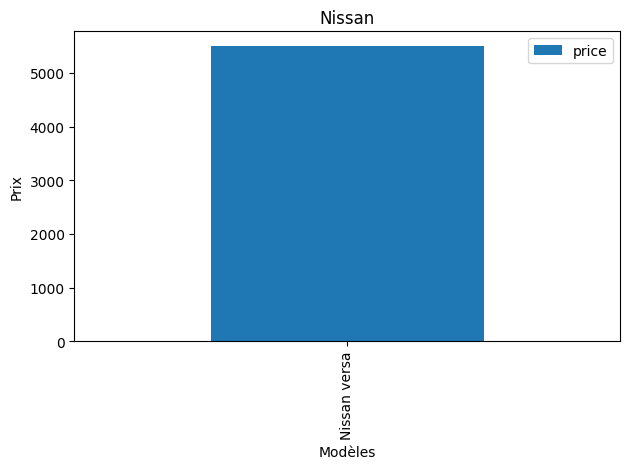

<Figure size 640x480 with 0 Axes>

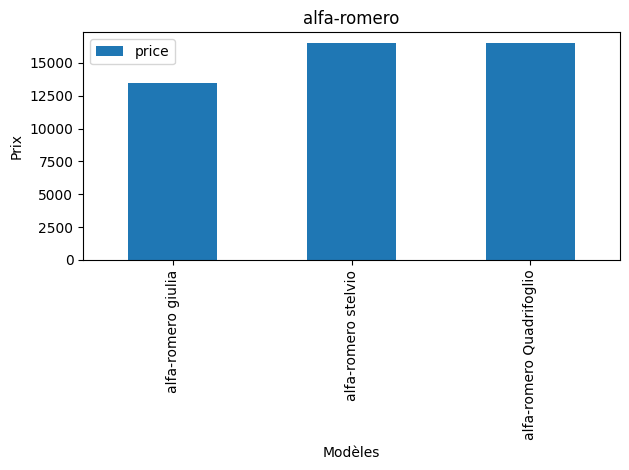

<Figure size 640x480 with 0 Axes>

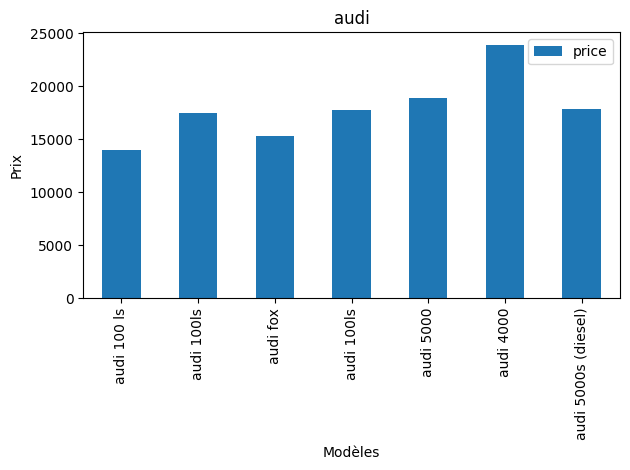

<Figure size 640x480 with 0 Axes>

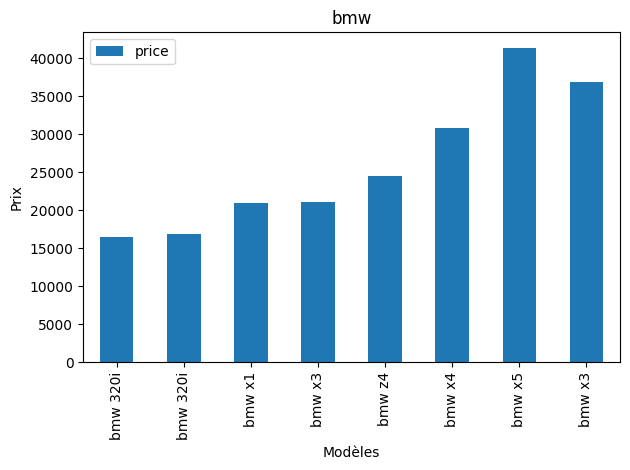

<Figure size 640x480 with 0 Axes>

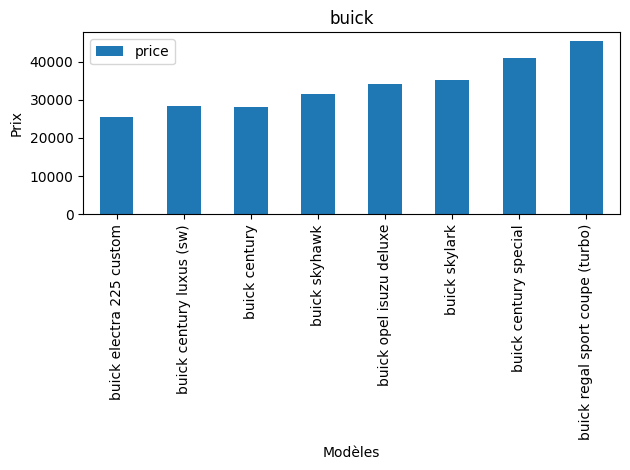

<Figure size 640x480 with 0 Axes>

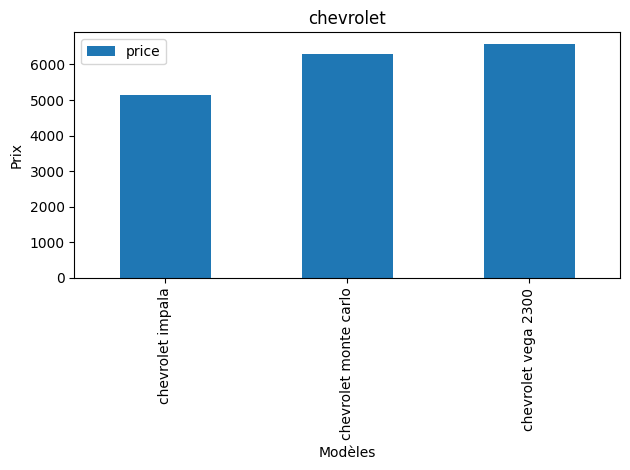

<Figure size 640x480 with 0 Axes>

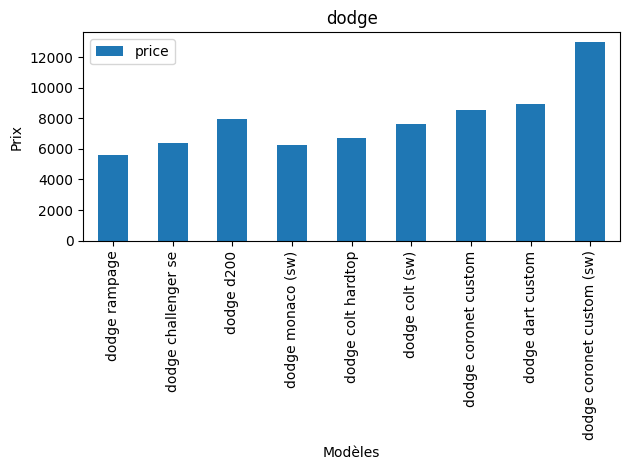

<Figure size 640x480 with 0 Axes>

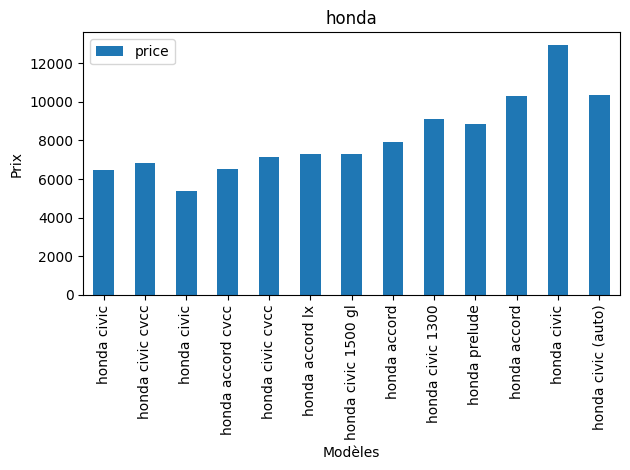

<Figure size 640x480 with 0 Axes>

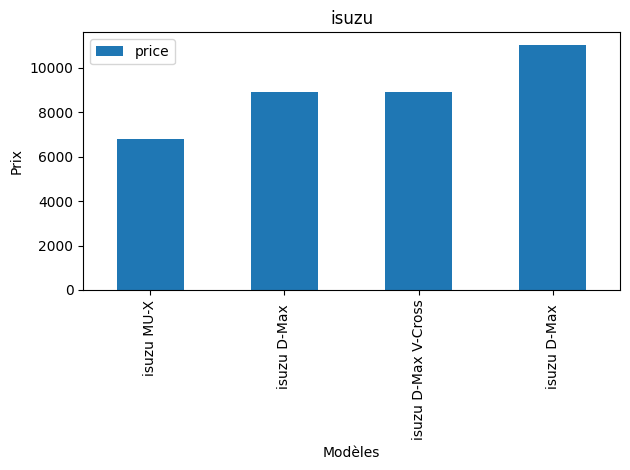

<Figure size 640x480 with 0 Axes>

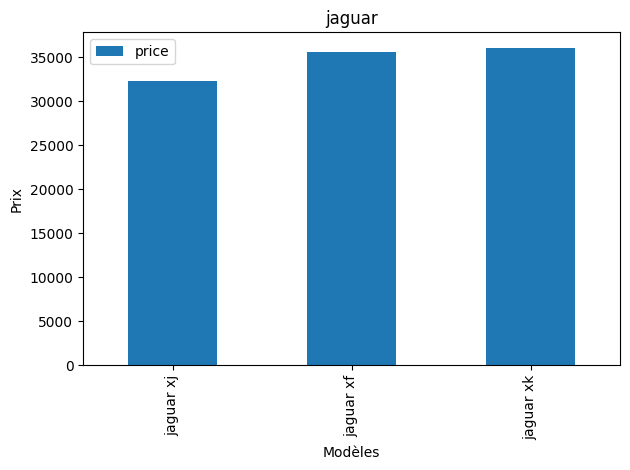

<Figure size 640x480 with 0 Axes>

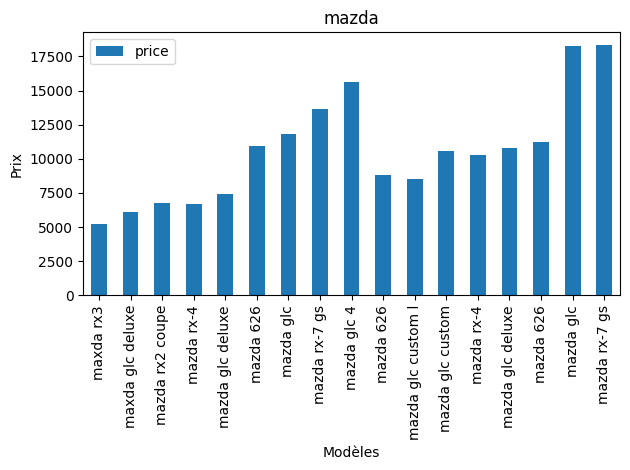

<Figure size 640x480 with 0 Axes>

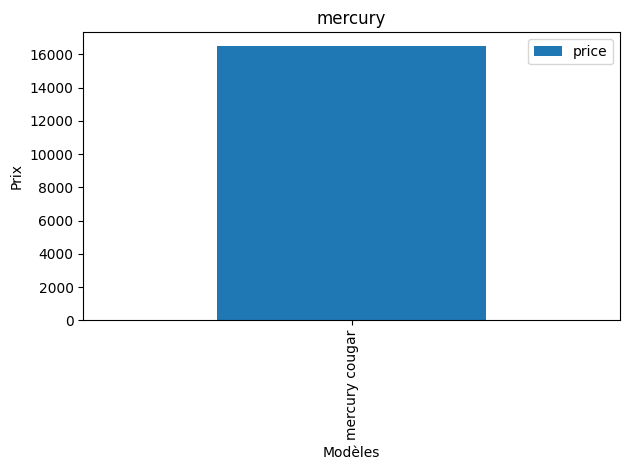

<Figure size 640x480 with 0 Axes>

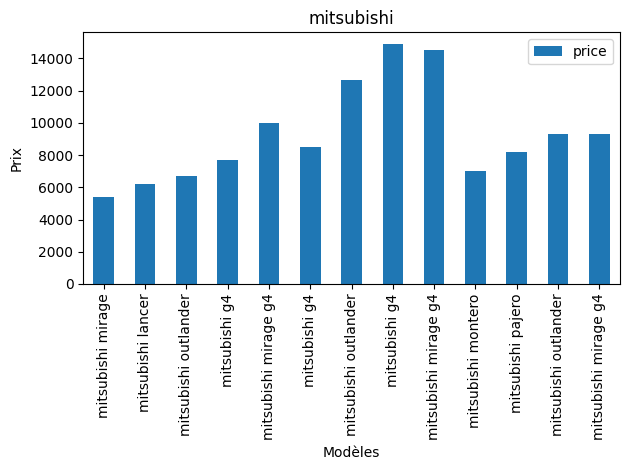

<Figure size 640x480 with 0 Axes>

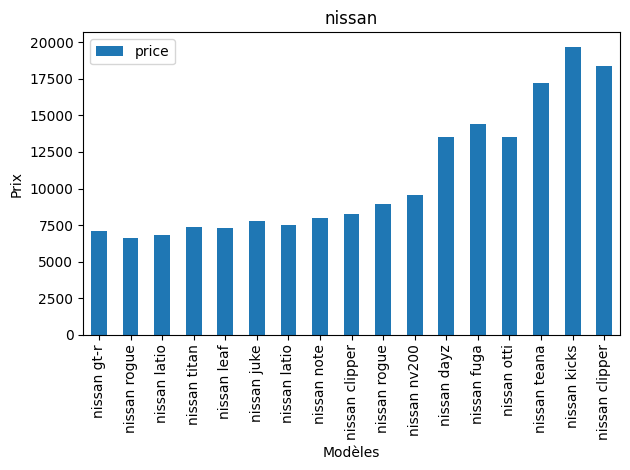

<Figure size 640x480 with 0 Axes>

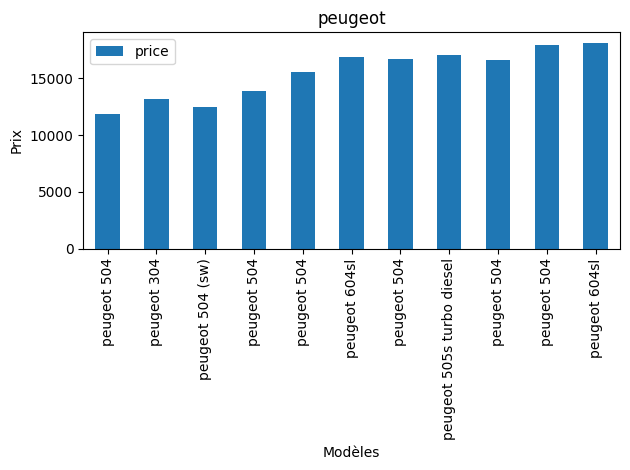

<Figure size 640x480 with 0 Axes>

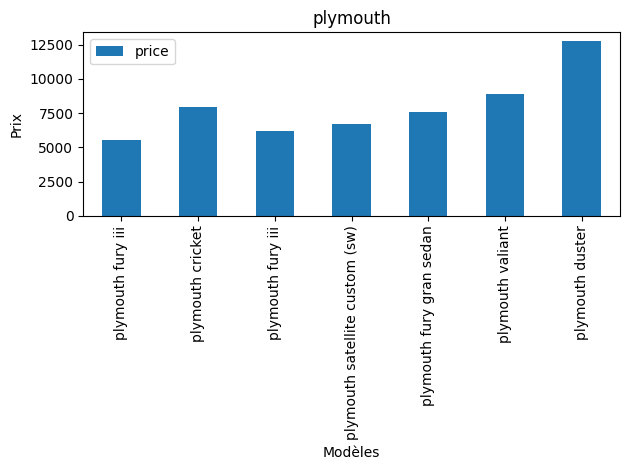

<Figure size 640x480 with 0 Axes>

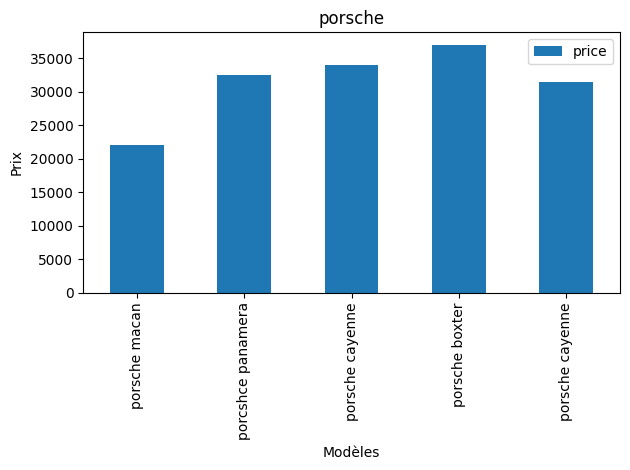

<Figure size 640x480 with 0 Axes>

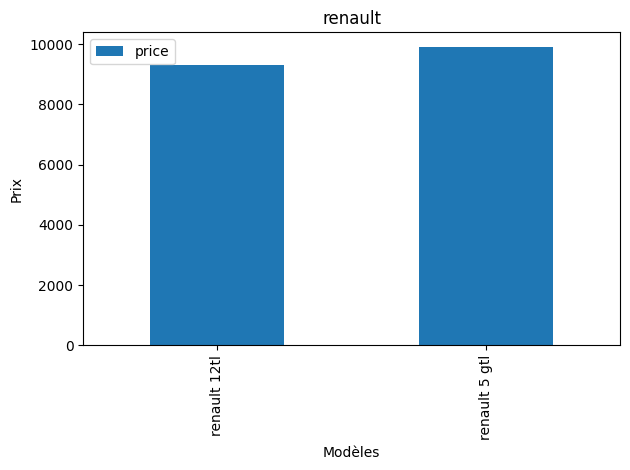

<Figure size 640x480 with 0 Axes>

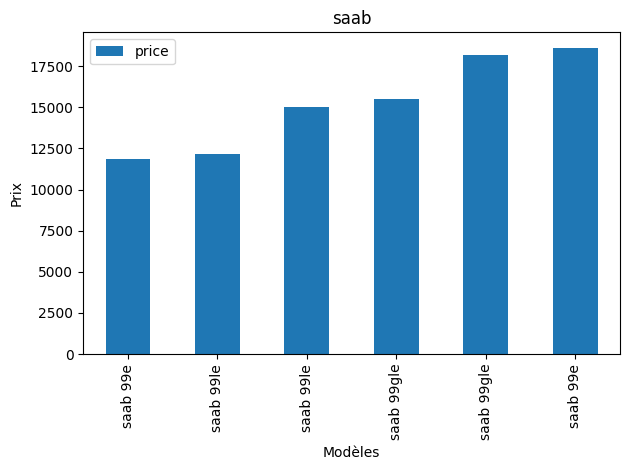

<Figure size 640x480 with 0 Axes>

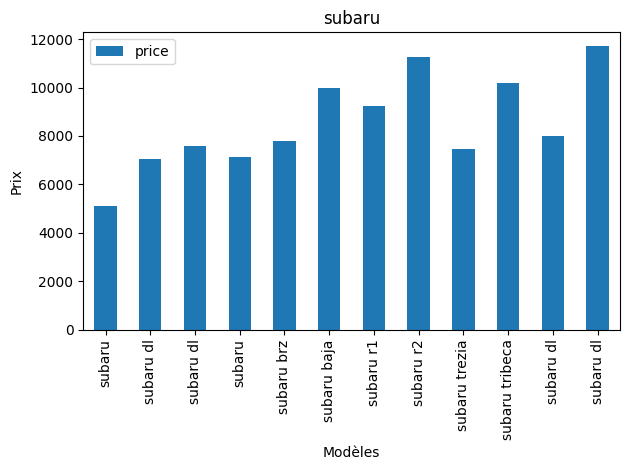

<Figure size 640x480 with 0 Axes>

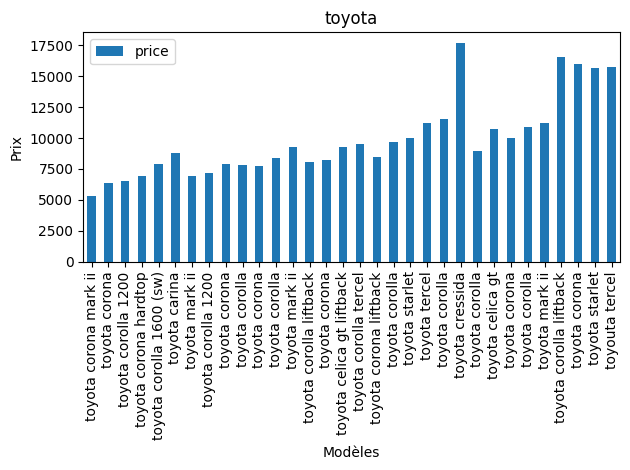

<Figure size 640x480 with 0 Axes>

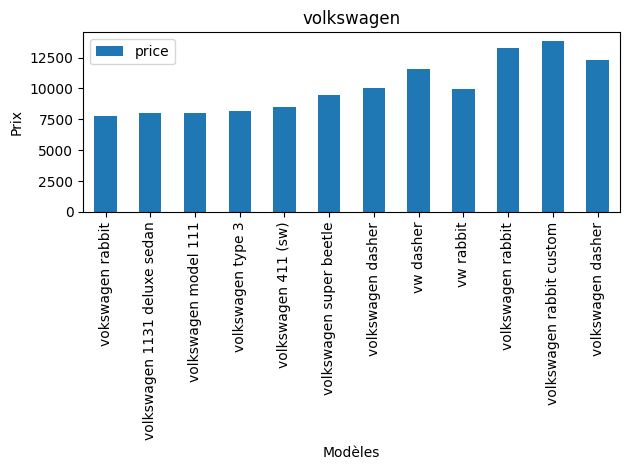

<Figure size 640x480 with 0 Axes>

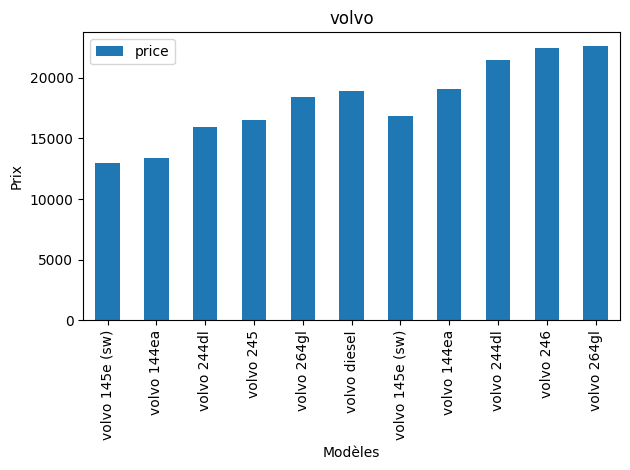

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# Regrouper les données par marque
grouped = df.groupby('CompanyName')

# Créer un barplot pour chaque groupe
for name, group in grouped:
    plt.figure()
    ax = group.plot(kind='bar', x='CarName', y='price', rot=90)
    ax.set_title(name)
    ax.set_xlabel('Modèles')
    ax.set_ylabel('Prix')
    plt.tight_layout()
    plt.show()


Les modèles au sein d'une même marque influence de façon significative sur les prix. Il est donc intéréssant de ne pas se baser uniquement sur la marque pour notre modèle de ML. 

### Corrélation des données chiffrées avec le prix

In [23]:
corr = df.corr()

/tmp/ipykernel_37229/658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


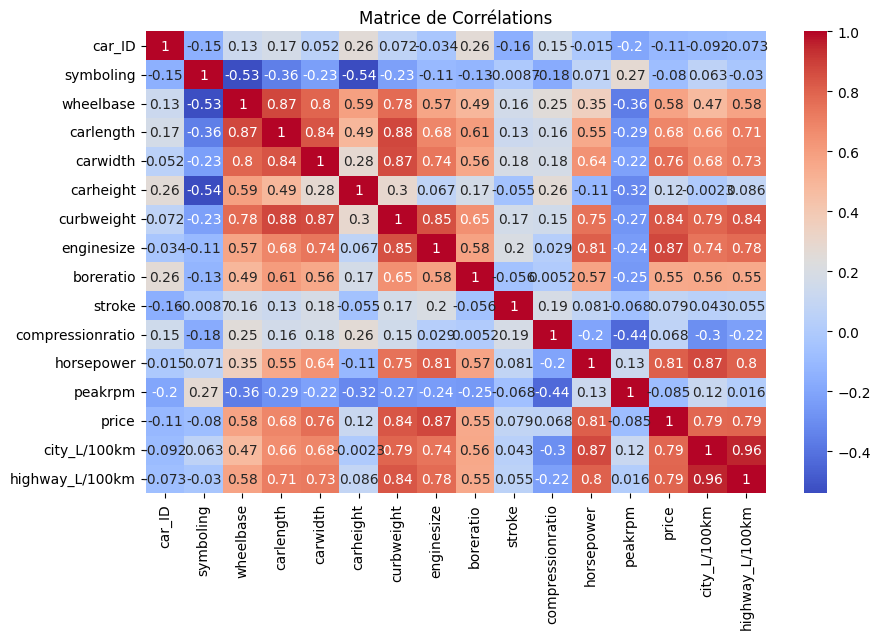

In [24]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6) )
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Matrice de Corrélations")
plt.show()

On remarque des corrélations élévées avec le prix ce qui est idéal pour établir un modèle de régréssion linéaire pour l'estimation du prix. 

### Boxplot des données catégorielles en fonction du prix

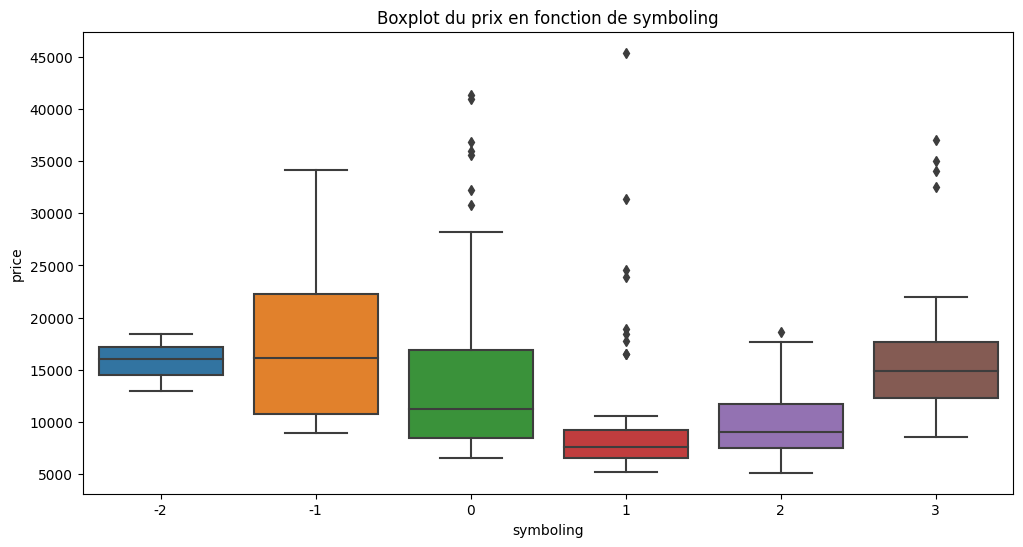

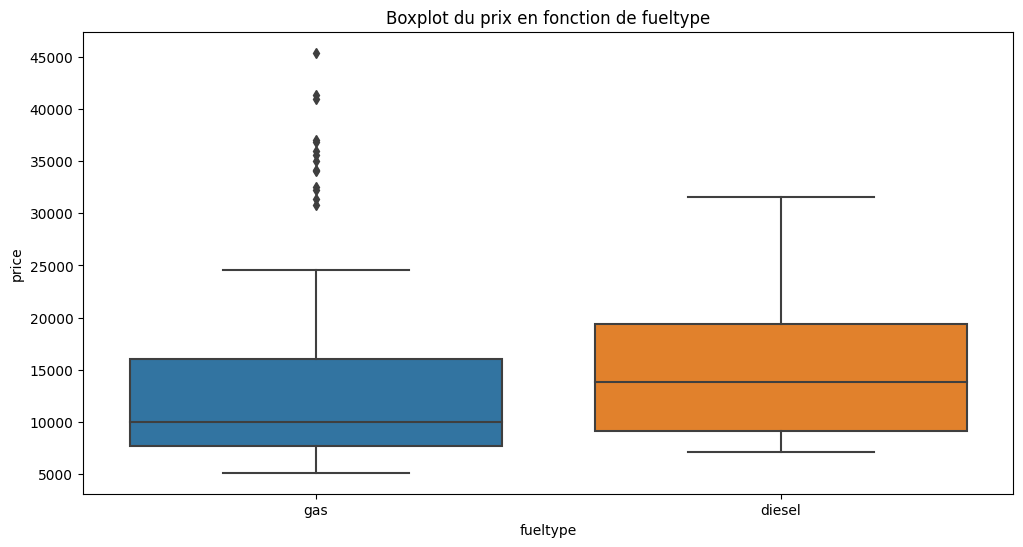

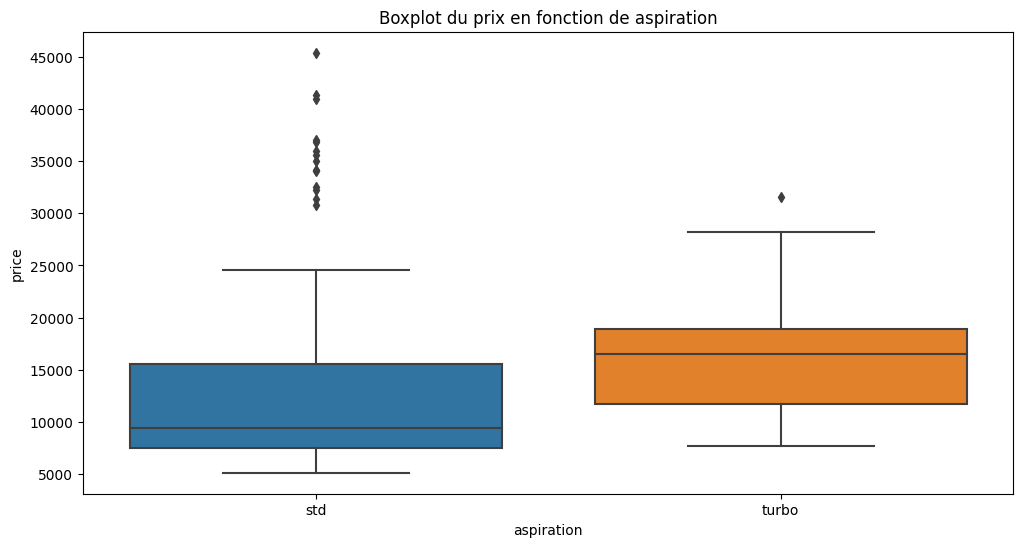

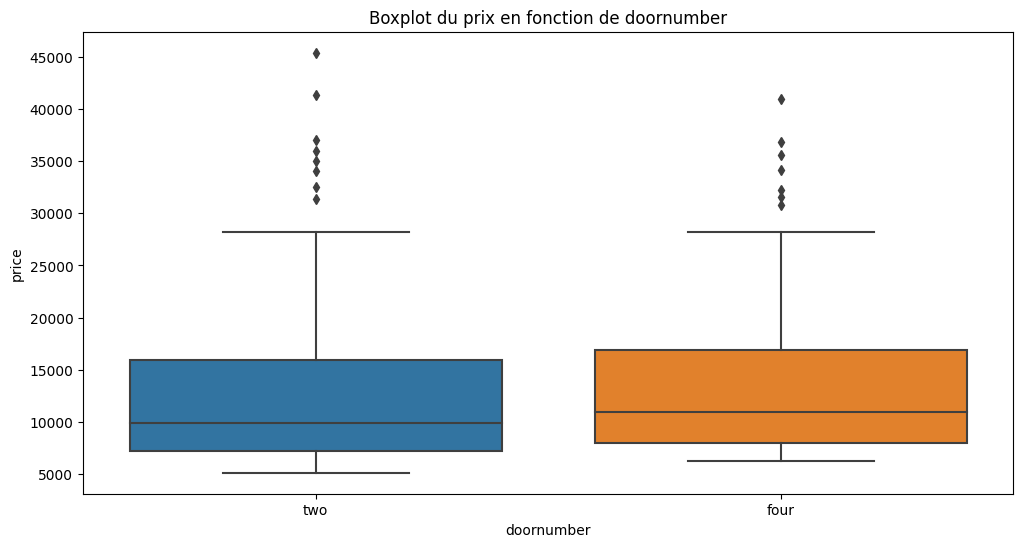

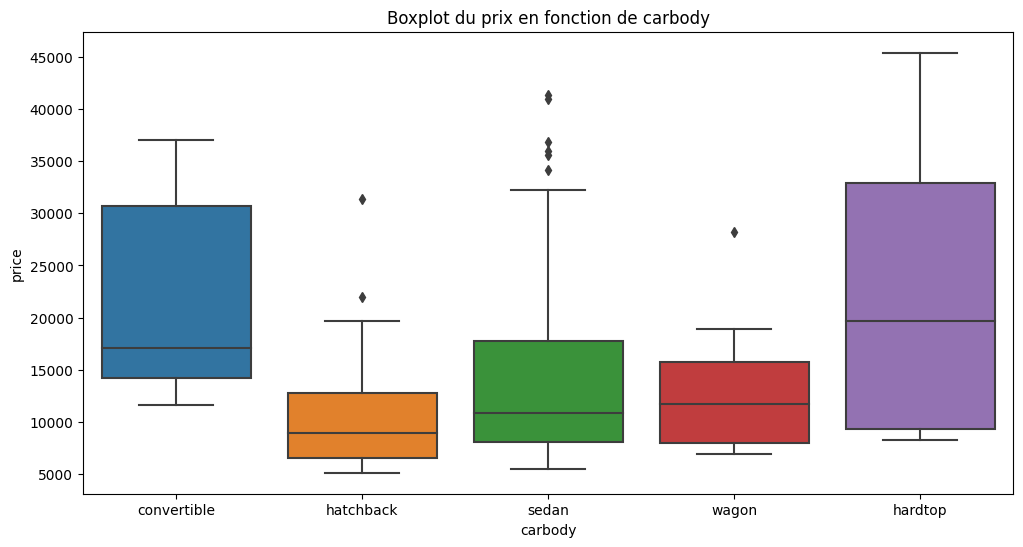

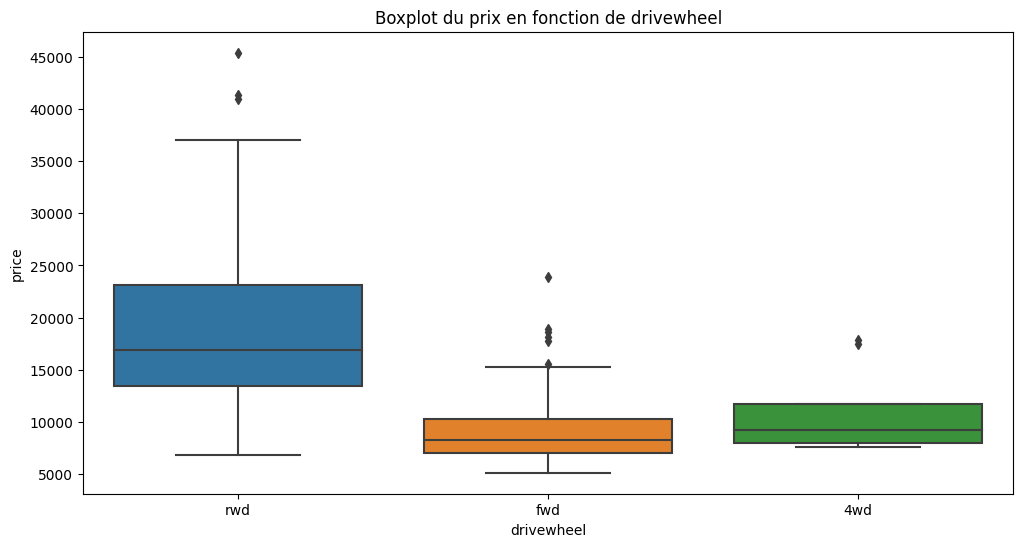

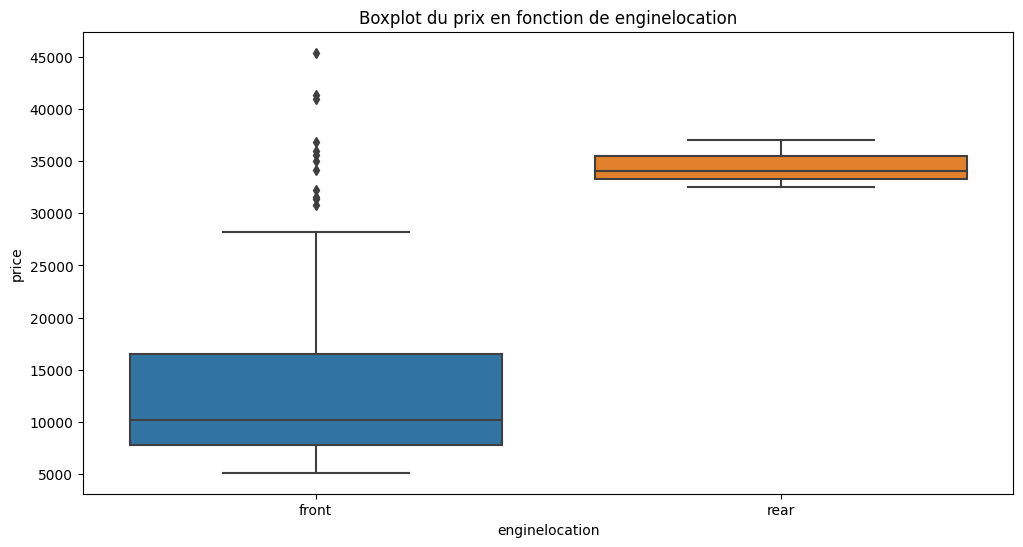

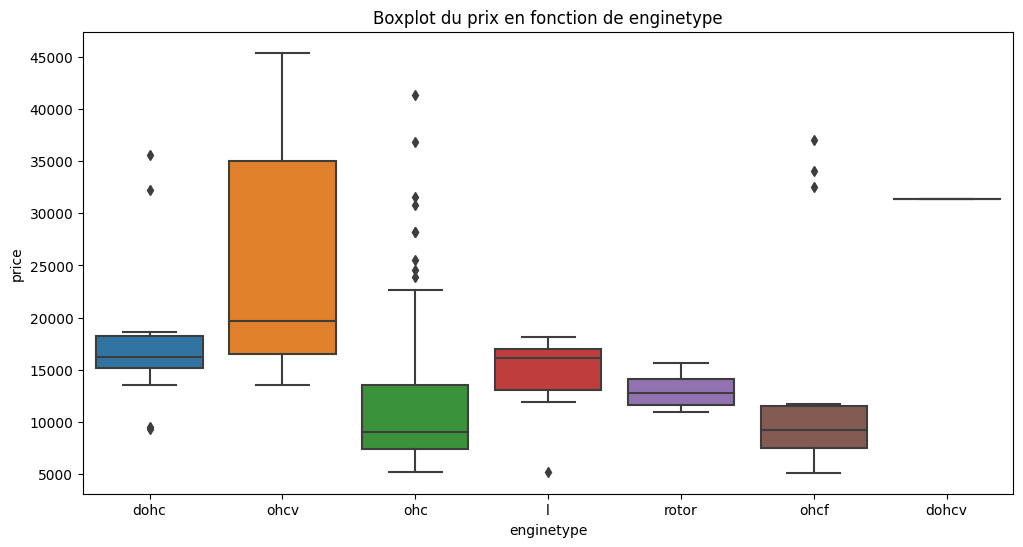

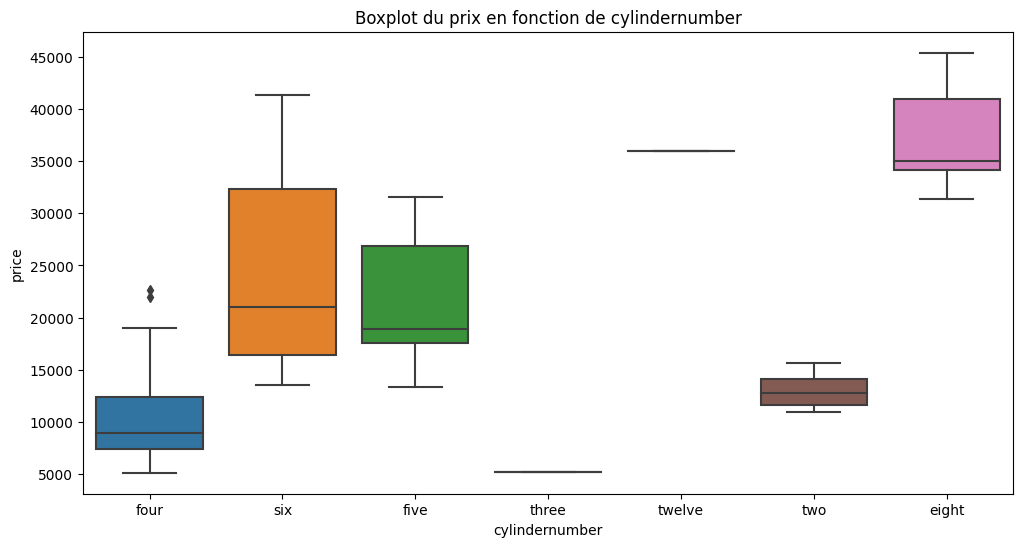

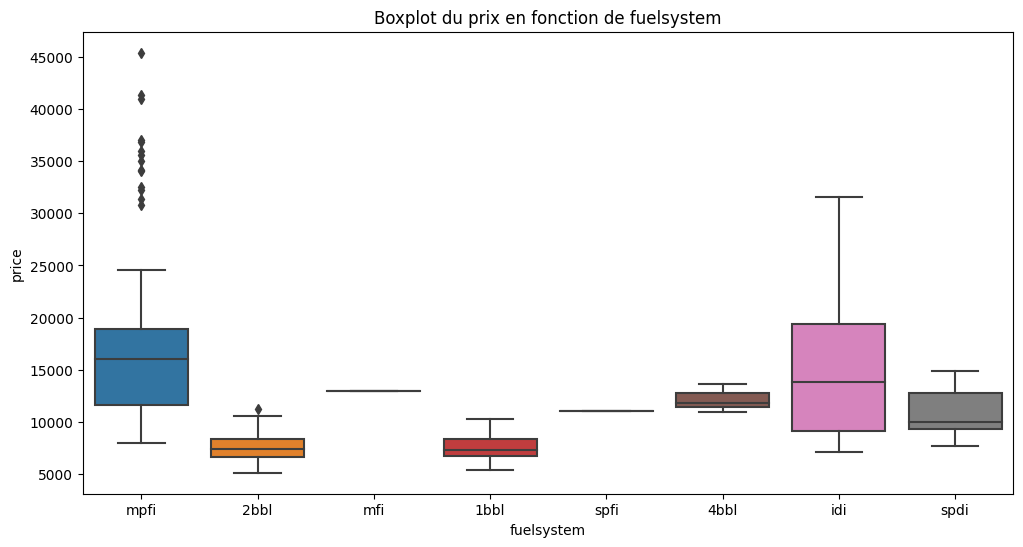

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes à utiliser pour les boxplots
cols = ["symboling", "fueltype", "aspiration", "doornumber", 
        "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", 
        "fuelsystem"]

# Parcourir chaque colonne et produire un boxplot Seaborn
for col in cols:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col, y="price", data=df)
    plt.title(f"Boxplot du prix en fonction de {col}")
    plt.show()



In [26]:
df.dtypes

car_ID                int64
symboling             int64
CompanyName          object
CarModel             object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
price               float64
city_L/100km        float64
highway_L/100km     float64
dtype: object

In [27]:
df.to_csv('carprice_cleaned.csv', index=False)